# Random Forest - Predicción de ImpactPlayerScore en CS:GO
Este notebook sigue la metodología CRISP-DM hasta la fase 4 para evaluar el modelo de regresión: **Random Forest**.

In [1]:
# Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
#Cargar datos y crear variables

url = "https://raw.githubusercontent.com/Seba-RiveraC/Crisp_DM_CSGO/refs/heads/master/Anexo%20ET_demo_round_traces_2022%20(1).csv"
df = pd.read_csv(url, sep=';')
# Crear variables necesarias
df['ImpactPlayerScore'] = df['RoundKills'] + 0.5 * df['RoundAssists'] + df['RoundHeadshots']
df['KAST'] = ((df['RoundKills'] > 0) | (df['RoundAssists'] > 0)).astype(int)
#para propositos de que no se rompa el collab, se usara una parte del dataset
df = df.sample(frac=0.45, random_state=42)

<ipython-input-2-2c022bf797be>:4: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


In [3]:
# Fase 3 - Preparación de datos y limpieza
df_model = df.copy()
df_model = df_model.applymap(lambda x: str(x) if isinstance(x, str) or isinstance(x, bool) else x)
df_model = df_model.replace({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})
for col in df_model.columns:
    if df_model[col].dtype == bool:
        df_model[col] = df_model[col].astype(int)
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

<ipython-input-3-6e3455b4a4bb>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_model = df_model.applymap(lambda x: str(x) if isinstance(x, str) or isinstance(x, bool) else x)
<ipython-input-3-6e3455b4a4bb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model = df_model.replace({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})



Modelo: Random Forest
MAE: 0.55945486189086
RMSE: 1.0019903908877543
R²: 0.46924957394879363


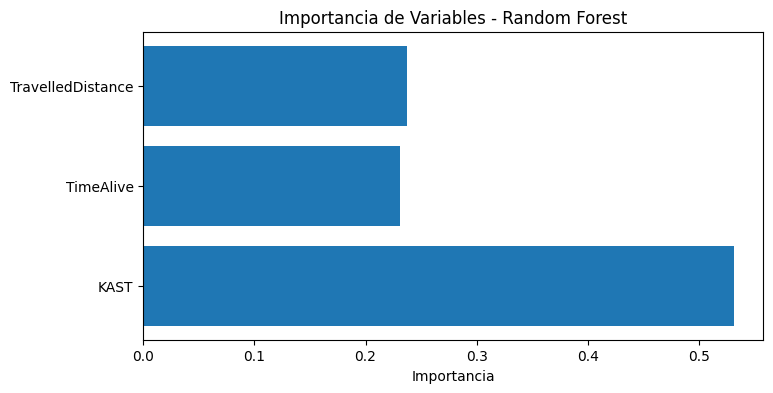

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
# Copia para trabajar
df_model = df.copy()

# Función para convertir strings con formato europeo a float
def convertir_a_float(valor):
    if isinstance(valor, str):
        valor = valor.replace('.', '').replace(',', '.')
        try:
            return float(valor)
        except:
            return np.nan
    return valor

# Aplicar limpieza
columnas = ['TimeAlive', 'TravelledDistance', 'KAST', 'ImpactPlayerScore']
for col in columnas:
    df_model[col] = df_model[col].apply(convertir_a_float)

# Eliminar nulos
df_model = df_model.dropna(subset=columnas)

# Variables
X = df_model[['KAST', 'TimeAlive', 'TravelledDistance']]
y = df_model['ImpactPlayerScore']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Modelo Random Forest
modelo = RandomForestRegressor(random_state=42, n_estimators=100)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Evaluación
print("\nModelo: Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Importancia de variables
importancia = modelo.feature_importances_
variables = X.columns

plt.figure(figsize=(8, 4))
plt.barh(variables, importancia)
plt.xlabel("Importancia")
plt.title("Importancia de Variables - Random Forest")
plt.show()



## Analisis
Al reducir la muestra y mostrar los valores dependiendo de la importancia para la determinacion de los parametros del modelo se puede observar que el modelo hace su funcion de prediccion bastante bien, esto se ve reflejado por medio de que usando solo 3 variables se alcanzan valores de deduccion bastante altos y de error bastante bajos.
En parte concluyendo hemos decidido usar el modelo de regresion de Random Forest para los futuros avances en la puesta en marcha del proyecto para las siguientes entregas